In [39]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
plt.style.use('plotting')

In [40]:
#primary
sample = np.loadtxt('M31analogs_halo_props_TNG100_revised.txt') 
print(sample[0], len(sample))

ids = sample[:,0]
halo_mass = sample[:,7]*1e10/0.704
stellar_mass = sample[:,8]*1e10/0.704
vmax = sample[:,9]
subhalomass = np.loadtxt('M31analogs_halo_props_TNG100_revised_subhalomass.txt')[:,10]*1e10/0.704

[ 4.29041000e+05  3.07635352e+03  3.25153672e+04  3.90027686e+03
 -1.47242756e+01 -3.30249146e+02  1.10245094e+02  1.02576187e+02
  3.81455040e+00  2.17312149e+02] 93


In [49]:
#full
fsample = np.loadtxt('M31analogs_halo_props_TNG100_revised_subhalomass.txt') 
print(sample[0], len(sample))

fids = fsample[:,0]
fhalo_mass = fsample[:,7]*1e10/0.704
fstellar_mass = fsample[:,8]*1e10/0.704
fvmax = fsample[:,9]
fhlr = fsample[:,11]/0.704
#subhalomass = np.loadtxt('M31analogs_halo_props_TNG100_revised_subhalomass.txt')[:,10]*1e10/0.704

[ 4.29041000e+05  3.07635352e+03  3.25153672e+04  3.90027686e+03
 -1.47242756e+01 -3.30249146e+02  1.10245094e+02  1.02576187e+02
  3.81455040e+00  2.17312149e+02] 93


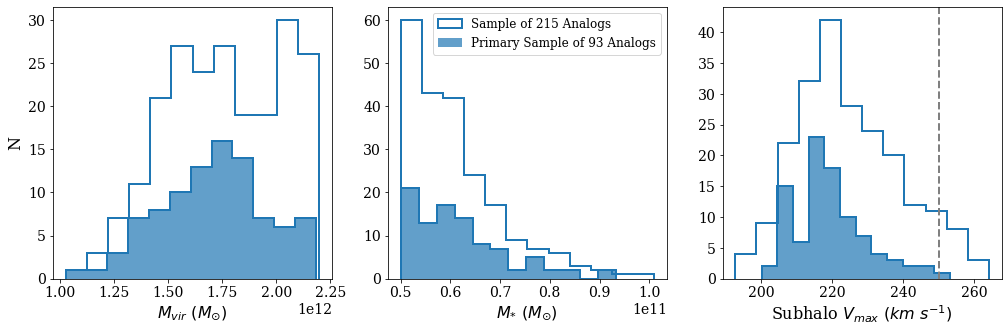

In [50]:
plt.figure(figsize=(17,5))
plt.subplot(131)
plt.hist(halo_mass, bins = 12, lw=2, color='C0',alpha=0.7,)
plt.hist(halo_mass, bins = 12, lw=2, histtype='step',color='C0')
plt.hist(fhalo_mass, bins = 12,  histtype='step', lw=2)
plt.xlabel(r'$M_{vir}\, \, (M_{\odot})$')
plt.ylabel('N')

plt.subplot(132)
plt.hist(fstellar_mass, bins = 12, histtype='step', lw=2, label='Sample of 215 Analogs')
plt.hist(stellar_mass, bins = 12, color='C0', lw=2, alpha=0.7,label='Primary Sample of 93 Analogs')
plt.hist(stellar_mass, bins = 12, lw=2, histtype='step',color='C0')
plt.xlabel(r'$M_{*}\, \, (M_{\odot})$')
plt.legend(fontsize=12)

plt.subplot(133)
plt.hist(vmax, bins = 12, color='C0',alpha=0.7, lw=2)
plt.hist(vmax, bins = 12, color='C0',histtype='step', lw=2)
plt.hist(fvmax, bins = 12, histtype='step', lw=2)
plt.xlabel(r'Subhalo $V_{max}\,\, (km \, \, s^{-1})$')
plt.axvline(x=250, ls='--',c='gray')
plt.savefig('properties_histograms.png')

In [51]:
mergers = np.loadtxt('M31analogs_merger_props_TNG100_revised.txt')
all_ids = mergers[:,0]
mask = np.in1d(all_ids, ids) #create mask of ids in the primary sample and apply to these properties
last_maj = mergers[:,2]
num_maj = mergers[:,3]
num_min = mergers[:,4]
print(len(last_maj),len(last_maj[mask]))

215 93


8.06560019250075 8.06560019250075


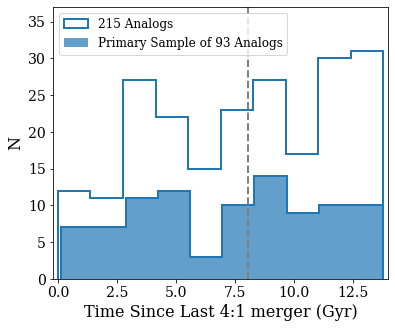

In [52]:
plt.figure(figsize=(6,5))
plt.hist(last_maj, bins=10, histtype='step', lw=2, label='215 Analogs')
plt.hist(last_maj[mask], bins=10, histtype='step',color='C0', lw=2)
plt.hist(last_maj[mask], bins=10, alpha=0.7, color='C0',lw=2, label='Primary Sample of 93 Analogs')
plt.xlabel('Time Since Last 4:1 merger (Gyr)')
plt.ylabel('N')
plt.legend(loc='upper left')
print(np.median(last_maj[mask]),np.median(last_maj))
plt.axvline(x=np.median(last_maj[mask]), ls='--', color='gray')
plt.xlim(-0.2,14.)
plt.ylim(0,37)
plt.savefig('last_maj_merger_time.png')

4.0 3.0 7.0 24.0 93


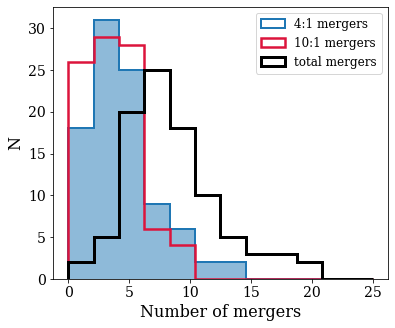

In [53]:
plt.figure(figsize=(6,5))
tot = num_maj+num_min
print(num_maj[0], num_min[0], tot[0], np.max(tot), len(tot[mask]))
plt.hist(num_maj[mask], bins=12, range=(0,25), histtype='step', lw=2, label='4:1 mergers')
plt.hist(num_maj[mask], bins=12, range=(0,25), alpha=0.5, color='C0', lw=2)
plt.hist(num_min[mask], bins=12, range=(0,25), histtype='step', color='crimson', lw=2.5, label='10:1 mergers')
plt.hist(tot[mask], bins=12,range=(0,25), histtype='step', color='k', lw=3, label='total mergers')
plt.xlabel('Number of mergers')
plt.ylabel('N')
plt.legend(loc='upper right')
plt.savefig('num_of_mergers.png')

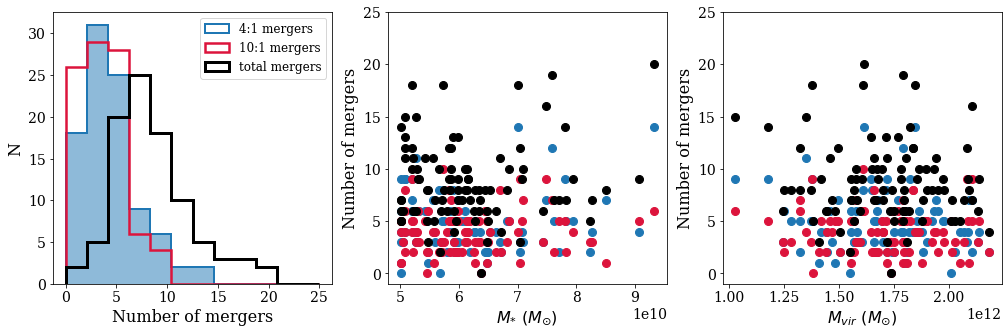

In [54]:
plt.figure(figsize=(17,5))
plt.subplot(131)
plt.hist(num_maj[mask], bins=12, range=(0,25), histtype='step', lw=2, label='4:1 mergers')
plt.hist(num_maj[mask], bins=12, range=(0,25), alpha=0.5, color='C0', lw=2)
plt.hist(num_min[mask], bins=12, range=(0,25), histtype='step', color='crimson', lw=2.5, label='10:1 mergers')
plt.hist(tot[mask], bins=12,range=(0,25), histtype='step', color='k', lw=3, label='total mergers')
plt.xlabel('Number of mergers')
plt.ylabel('N')
plt.legend(loc='upper right')

plt.subplot(132)
plt.plot(stellar_mass, num_maj[mask], 'o', ms=8, color='C0')
plt.plot(stellar_mass, num_min[mask], 'o', ms=8, color='crimson')
plt.plot(stellar_mass,tot[mask], 'o', ms=8, color='k')
plt.ylim(-1,25)
plt.ylabel('Number of mergers')
plt.xlabel(r'$M_{*}\, \, (M_{\odot})$')
#plt.xscale("log")
#print(len(stellar_mass[stellar_mass > 9e10]))

plt.subplot(133)
plt.plot(halo_mass, num_maj[mask], 'o', ms=8, color='C0')
plt.plot(halo_mass, num_min[mask], 'o', ms=8, color='crimson')
plt.plot(halo_mass,tot[mask], 'o', ms=8, color='k')
plt.xlabel(r'$M_{vir}\, \, (M_{\odot})$')
plt.ylabel('Number of mergers')
plt.ylim(-1,25)
plt.savefig('num_mergers_vs_masses.pdf')
#plt.xscale("log")

215


Text(0.5, 0, '$M_{sub}\\, \\, [M_{\\odot}]$')

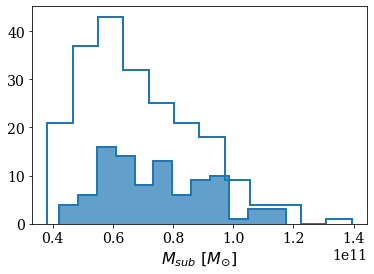

In [58]:
#apply mask here too
plt.figure()
print(len(subhalomass))
plt.hist(subhalomass, bins = 12, histtype='step', lw=2)
plt.hist(subhalomass[mask], bins = 12, histtype='step',color='C0', lw=2)
plt.hist(subhalomass[mask], bins = 12, color='C0',alpha=0.7, lw=2)

plt.xlabel(r'$M_{sub}\, \, [M_{\odot}]$')

215


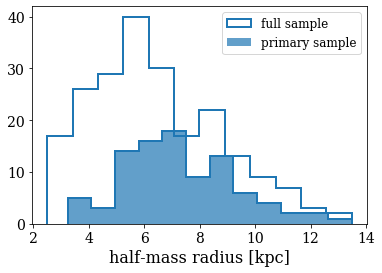

In [62]:
plt.figure()
print(len(subhalomass))
plt.hist(fhlr, bins = 12, histtype='step', lw=2, label='full sample')
plt.hist(fhlr[mask], bins = 12, histtype='step',color='C0', lw=2)
plt.hist(fhlr[mask], bins = 12, color='C0',alpha=0.7, lw=2, label='primary sample')
plt.legend()
plt.xlabel('half-mass radius [kpc]')
plt.savefig('half_mass_radius_hist.png')